In [41]:
from fastai.vision.all import *

### MNIST AVERAGE

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
threes = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train' / '7').ls().sorted()

In [4]:
three_images = [tensor(Image.open(impath)) for impath in threes]
seven_images = [tensor(Image.open(impath)) for impath in sevens]

<Axes: >

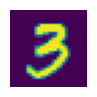

In [5]:
show_image(three_images[3])

In [6]:
stacked_threes = torch.stack(three_images[:-500]).float()/255
stacked_sevens = torch.stack(seven_images[:-500]).float()/255

In [7]:
three_test = torch.stack(three_images[-500:]).float()/255
seven_test = torch.stack(seven_images[-500:]).float()/255

In [8]:
three = stacked_threes.mean(0)
seven = stacked_sevens.mean(0)

In [9]:
def mse(t1, t2):
    return ((t1 - t2)**2).mean().sqrt()

In [10]:
def is_3(image):
    return mse(image, three) < mse(image, seven)

In [11]:
def accuracy():
    failed = 0
    for test in three_test:
        if not is_3(test):
            failed += 1
    for test in seven_test:
        if is_3(test):
            failed += 1
    return 1 - (failed / (len(three_test) + len(seven_test)))

In [12]:
accuracy()

0.958

### STOCHASTIC GRADIENT DESCENT

In [27]:
torch.set_default_device("mps")

In [28]:
def f(time, params):
    a, b, c = params
    return a * (time ** 2) + b * time + c

In [29]:
time_stamps = torch.arange(20).float()
time_stamps

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.], device='mps:0')

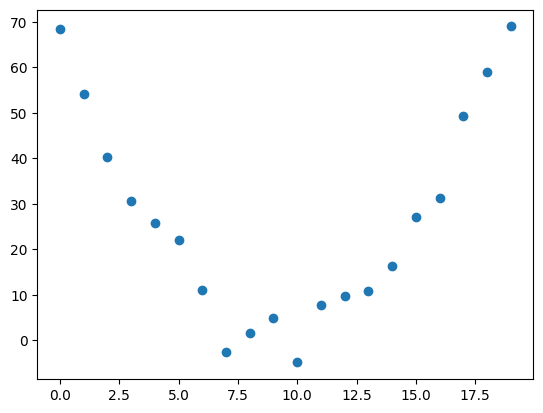

In [31]:
speeds = torch.randn(20) * 3 + .75 * (time_stamps - 9.5) ** 2 + 1
plt.scatter(time_stamps.cpu(), speeds.cpu())

In [32]:
params = torch.randn(3).requires_grad_()
params

tensor([-3.1339, -1.0954,  0.0978], device='mps:0', requires_grad=True)

In [34]:
def epoch(params):
    lr = 10 ** -5
    preds = f(time_stamps, params)
    loss = F.mse_loss(speeds, preds)
    loss.backward()
    params.data -= params.grad.data * lr
    grad = params.grad
    params.grad = None
    return grad

In [35]:
preds = f(time_stamps, params)

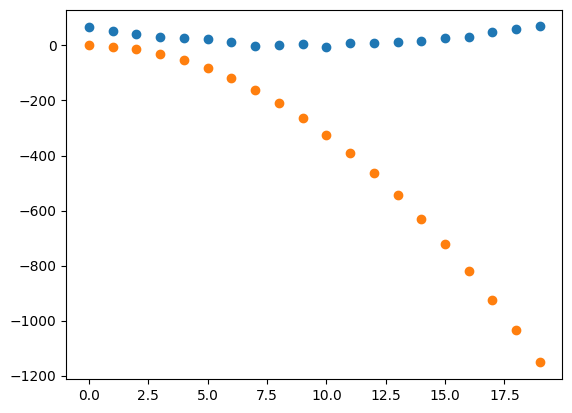

In [36]:
plt.scatter(time_stamps.cpu(), speeds.cpu())
plt.scatter(time_stamps.cpu(), to_np(preds))

In [37]:
import time

start = time.time()
grad = epoch(params)
while(grad.abs().mean() > .5): 
    grad = epoch(params)
    
end = time.time()
end - start

852.3222823143005

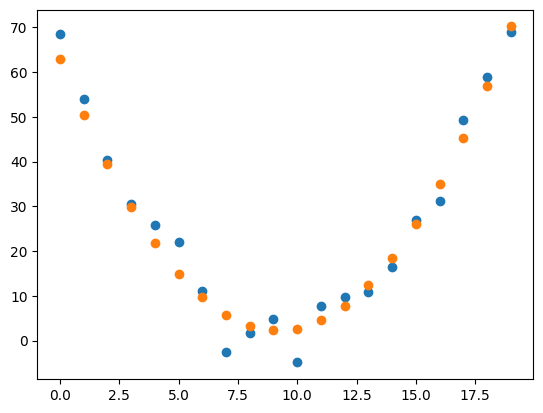

In [39]:
preds = f(time_stamps, params)
plt.scatter(time_stamps.cpu(), speeds.cpu())
plt.scatter(time_stamps.cpu(), to_np(preds))